In [1]:
options(warn = -1)
options(repr.plot.width=15, repr.plot.height=9) 
Sys.setlocale(category = "LC_ALL", locale = "ko_KR.UTF-8")

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [8]:

library(caret)
# 인공신경망 
library(nnet)


In [20]:
ford_f <- read.csv("./teamSave/ford_f.csv")

In [21]:
price_bins <- seq(10000, 40000, by = 5000)

ford_f$price_category <- cut(ford_f$price_in_euro, breaks = price_bins, labels = FALSE)

table(ford_f$price_category)


  1   2   3   4   5   6 
118 104  70  14   3   1 

In [33]:
for(i in 1:10) {
sampA <- createDataPartition(ford_f$price_category, p =0.7 , list = F)
data.trA <- ford_f[sampA,]
data.testA <- ford_f[-sampA,]

model.nnetA <- nnet(price_category ~ ., data=data.trA, size = 6) # size : 층 갯수

xA <- subset(data.testA, select = -price_category)
yA <- data.testA$price_category

predA <- predict(model.nnetA, xA, type = "raw") # class : 객관식 , raw : 주관식

mean(predA == yA)
cat("\n인공신경망 예측율 ", mean(predA == yA),"\t")
	}

cat("\n------------------------------------\n")
cat("\n인공신경망 평균 예측율 :", mean(mean(predA == yA)),"\n")
table(predA,yA)

# weights:  31
initial  value 272.398391 
final  value 230.358988 
converged

인공신경망 예측율  0 	# weights:  31
initial  value 225.627656 
final  value 211.260417 
converged

인공신경망 예측율  0 	# weights:  31
initial  value 340.009504 
final  value 230.358988 
converged

인공신경망 예측율  0 	# weights:  31
initial  value 289.586528 
final  value 213.220314 
converged

인공신경망 예측율  0 	# weights:  31
initial  value 266.628465 
final  value 218.460606 
converged

인공신경망 예측율  0 	# weights:  31
initial  value 287.007346 
final  value 209.842619 
converged

인공신경망 예측율  0 	# weights:  31


initial  value 321.239663 
final  value 211.899816 
converged

인공신경망 예측율  0 	# weights:  31
initial  value 261.789070 
final  value 202.350531 
converged

인공신경망 예측율  0 	# weights:  31
initial  value 319.125150 
final  value 220.809702 
converged

인공신경망 예측율  0 	# weights:  31
initial  value 225.866685 
final  value 211.899816 
converged

인공신경망 예측율  0 	
------------------------------------

인공신경망 평균 예측율 : 0 


     yA
predA -1.01446916767854 0.0234365814315174 1.06134233054158 2.09924807965164
    0                32                 34               21                3
     yA
predA 3.1371538287617 4.17505957787176
    0               1                1

In [25]:
 scaData <- scale(ford_f[,c("year","price_in_euro","mileage_in_km","price_category")])

In [26]:
result <- as.data.frame(scaData) 

In [32]:
result

year,price_in_euro,mileage_in_km,price_category
<dbl>,<dbl>,<dbl>,<dbl>
-3.505123,-1.47232228,0.96843135,-1.01446917
-3.505123,-0.92229041,-1.54818122,-1.01446917
-2.962371,-1.33970349,0.50558922,-1.01446917
-2.962371,-1.14637747,-0.12947323,-1.01446917
-2.962371,-0.93227247,-0.24793928,-1.01446917
-2.962371,-1.33155487,-0.51696896,-1.01446917
-2.419620,-0.82226610,-0.30169355,-1.01446917
-2.419620,-1.33970349,0.98995889,-1.01446917
-2.419620,-1.33970349,-0.23711093,-1.01446917


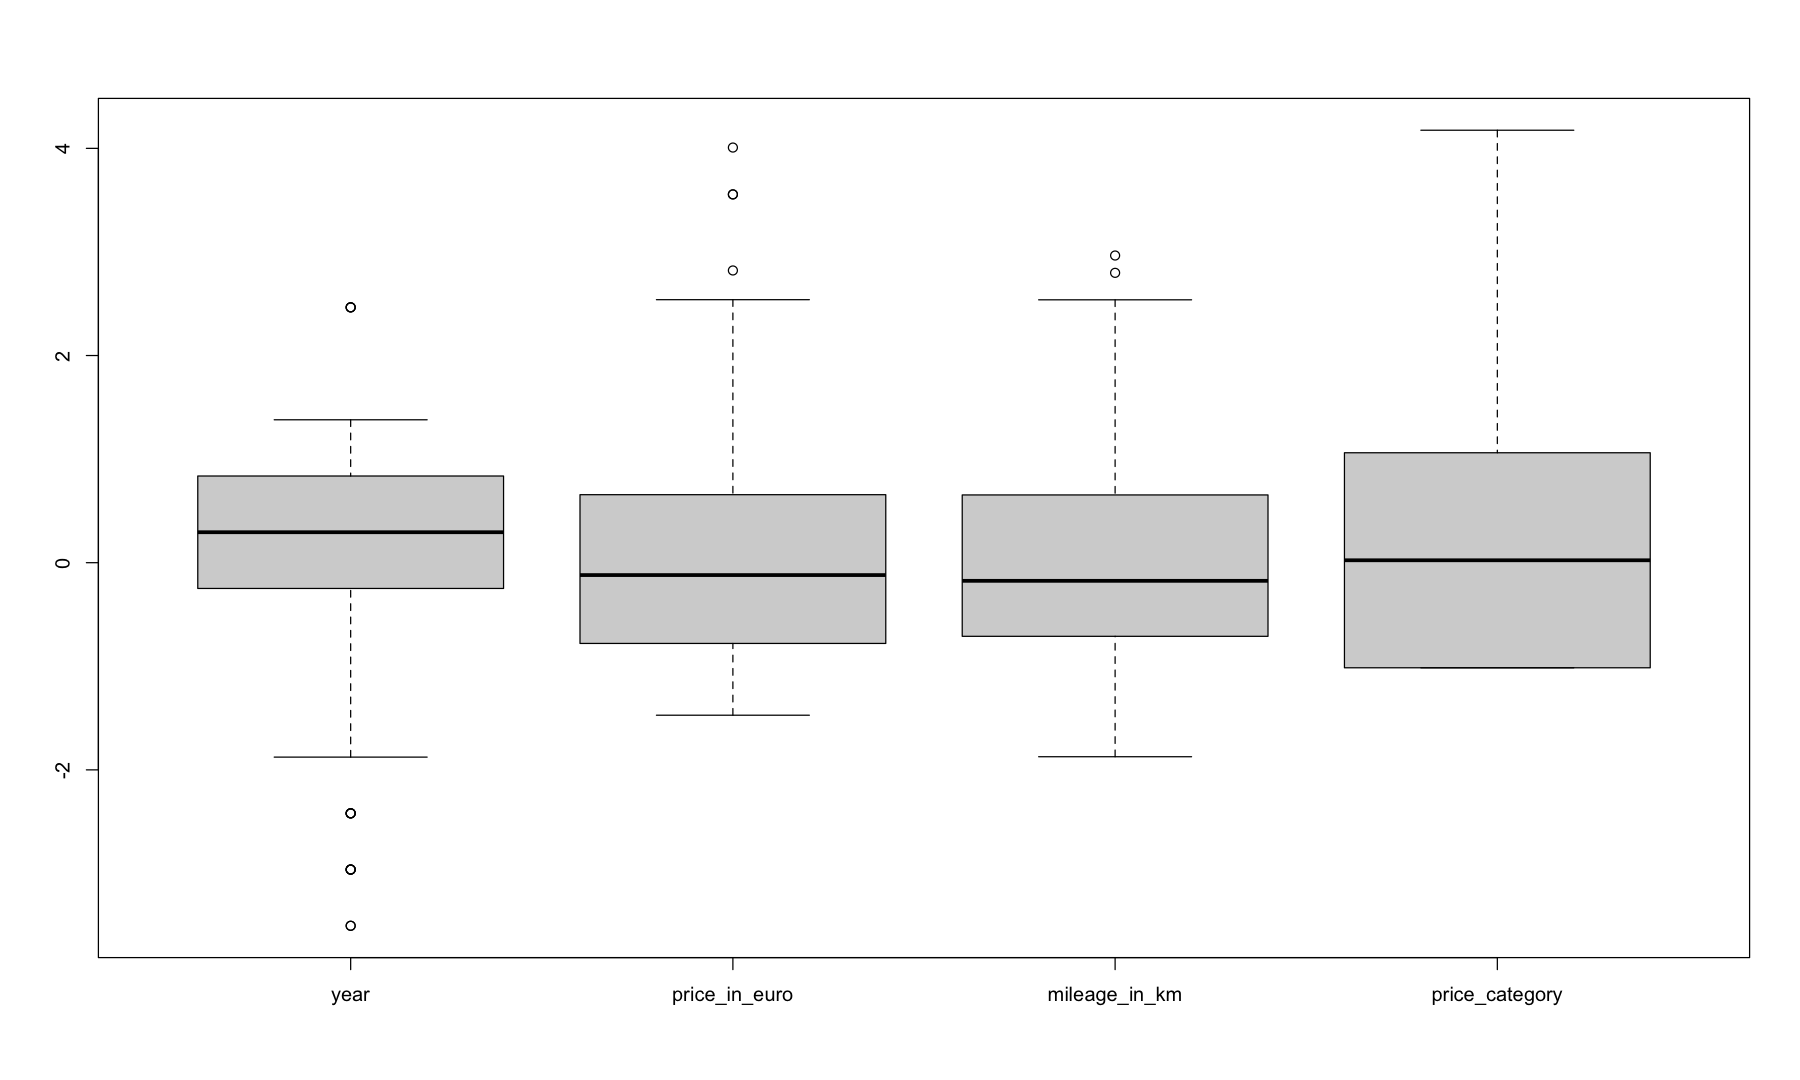

In [39]:
par(bg = 'white')
boxplot(result)


In [23]:
ford_f

year,price_in_euro,mileage_in_km,price_category
<int>,<int>,<int>,<int>
2012,10299,135000,1
2012,12999,18098,1
2013,10950,113500,1
2013,11899,84000,1
2013,12950,78497,1
2013,10990,66000,1
2014,13490,76000,1
2014,10950,136000,1
2014,10950,79000,1
